In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn 
from sklearn import linear_model
%matplotlib inline
clf = linear_model.LinearRegression()

In [93]:
book ="train.xlsx"
sheet="take01"  # 読み込むシート名
EXL  = pd.ExcelFile(book)  # xlsxファイルをPython上で開く
df = EXL.parse(sheet)
df.head()

,Survived,Pclass,Sex,Male,Age,SibSp,Parch,Fare,Cabin,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_No,Embarked,Cherbourg,Queenstown
0,0,3,male,0,22.0,1,0,7.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,0,0
1,1,1,female,1,38.0,1,0,71.2833,C85,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,C,1,0
2,1,3,female,1,26.0,0,0,7.9250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,0,0
3,1,1,female,1,35.0,1,0,53.1000,C123,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,S,0,0
4,0,3,male,0,35.0,0,0,8.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,0,0


In [94]:
del df['Sex']
del df['Embarked']
del df['Cabin']
del df['Cabin_No']
del df['Cabin_G']

In [95]:
df.head()

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cherbourg,Queenstown
0,0,3,0,22.0,1,0,7.2500,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1,1,1,38.0,1,0,71.2833,NaN,NaN,1.0,NaN,NaN,NaN,1,0
2,1,3,1,26.0,0,0,7.9250,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,1,1,1,35.0,1,0,53.1000,NaN,NaN,1.0,NaN,NaN,NaN,0,0
4,0,3,0,35.0,0,0,8.0500,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [96]:
df.describe() 

/Users/minemurarei/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cherbourg,Queenstown
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,15.0,47.0,59.0,33.0,33.0,13.0,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.0,1.0,1.0,1.0,1.0,1.0,0.188552,0.086420
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.0,0.0,0.0,0.0,0.0,0.0,0.391372,0.281141
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,0.000000,2.000000,0.000000,NaN,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,0.000000,3.000000,0.000000,NaN,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,1.000000,3.000000,1.000000,NaN,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000


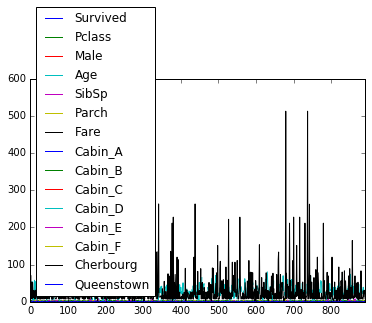

In [97]:
df.plot()

In [100]:
COV = pd.DataFrame(np.cov(df, rowvar=0, bias=0))
COV = np.array(COV.round(1).values)
COV

array([[  2.00000000e-01,  -1.00000000e-01,   1.00000000e-01,
                     nan,  -0.00000000e+00,   0.00000000e+00,
          6.20000000e+00,              nan,              nan,
                     nan,              nan,              nan,
                     nan,   0.00000000e+00,   0.00000000e+00],
       [ -1.00000000e-01,   7.00000000e-01,  -1.00000000e-01,
                     nan,   1.00000000e-01,   0.00000000e+00,
         -2.28000000e+01,              nan,              nan,
                     nan,              nan,              nan,
                     nan,  -1.00000000e-01,   1.00000000e-01],
       [  1.00000000e-01,  -1.00000000e-01,   2.00000000e-01,
                     nan,   1.00000000e-01,   1.00000000e-01,
          4.30000000e+00,              nan,              nan,
                     nan,              nan,              nan,
                     nan,   0.00000000e+00,   0.00000000e+00],
       [             nan,              nan,              nan,
     

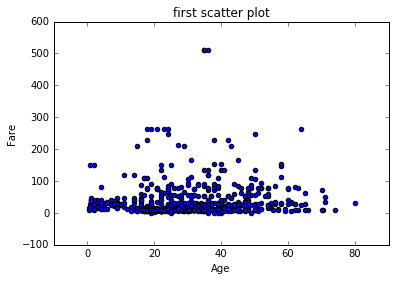

In [81]:
#散布図
plt.scatter(df.Age,df.Fare)
plt.title('first scatter plot')
plt.xlabel("Age")
plt.ylabel("Fare")

fig.show()

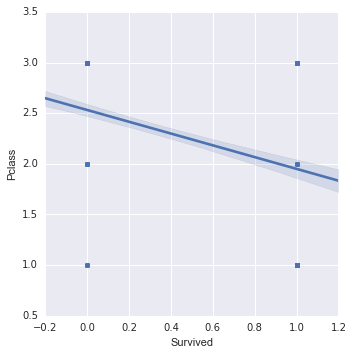

In [104]:
sns.lmplot("Survived","Pclass",df)

In [123]:
X = df.drop('Survived',axis=1).as_matrix()

In [125]:
Y = df['Survived'].as_matrix()

In [126]:
clf.fit(X, Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [115]:
print(clf.coef_)

[ 1.]


In [116]:
print(clf.intercept_)

3.88578058619e-16


In [117]:
print(clf.score(X, Y))

1.0


In [134]:
%reload_ext rpy2.ipython

In [163]:
%%R
x <- read.delim(pipe("pbpaste"))

  Survived    Sex Male Age SibSp Parch Cabin Cabin_A Cabin_B Cabin_C Cabin_D
1        0   male    0  22     1     0             0       0       0       0
2        1 female    1  38     1     0   C85       0       0       1       0
3        1 female    1  26     0     0             0       0       0       0
4        1 female    1  35     1     0  C123       0       0       1       0
5        0   male    0  35     0     0             0       0       0       0
6        0   male    0  NA     0     0             0       0       0       0
  Cabin_E Cabin_F Embarked Cherbourg Queenstown
1       0       0        S         0          0
2       0       0        C         1          0
3       0       0        S         0          0
4       0       0        S         0          0
5       0       0        S         0          0
6       0       0        Q         0          1


In [175]:
%%R
data <- x[,c(1,2,4,5,6,7,8,10,11,12,13,14,15,19,20)]
head(data)

  Survived Pclass Male Age SibSp Parch    Fare Cabin_A Cabin_B Cabin_C Cabin_D
1        0      3    0  22     1     0  7.2500       0       0       0       0
2        1      1    1  38     1     0 71.2833       0       0       1       0
3        1      3    1  26     0     0  7.9250       0       0       0       0
4        1      1    1  35     1     0 53.1000       0       0       1       0
5        0      3    0  35     0     0  8.0500       0       0       0       0
6        0      3    0  NA     0     0  8.4583       0       0       0       0
  Cabin_E Cabin_F Cherbourg Queenstown
1       0       0         0          0
2       0       0         1          0
3       0       0         0          0
4       0       0         0          0
5       0       0         0          0
6       0       0         0          1


In [176]:
%%R
dim(data)

[1] 891  15


In [177]:
%%R
reg <- lm(Survived ~ ., data)
summary(reg)


Call:
lm(formula = Survived ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.01838 -0.20850 -0.07099  0.24318  0.99937 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7462472  0.0954450   7.819 1.97e-14 ***
Pclass      -0.1537812  0.0294308  -5.225 2.30e-07 ***
Male         0.4877228  0.0314066  15.529  < 2e-16 ***
Age         -0.0063891  0.0011320  -5.644 2.41e-08 ***
SibSp       -0.0494136  0.0173908  -2.841  0.00462 ** 
Parch       -0.0125208  0.0189212  -0.662  0.50836    
Fare         0.0004022  0.0003655   1.100  0.27154    
Cabin_A      0.1953426  0.1207238   1.618  0.10609    
Cabin_B      0.0545260  0.0764235   0.713  0.47579    
Cabin_C     -0.0355320  0.0728085  -0.488  0.62569    
Cabin_D      0.1266540  0.0810968   1.562  0.11880    
Cabin_E      0.2102814  0.0793422   2.650  0.00822 ** 
Cabin_F      0.2157543  0.1166098   1.850  0.06470 .  
Cherbourg    0.0617482  0.0399811   1.544  0.12294    
Queenstow